# DS106 - Capstone Project 
### Student name: Chow Hooi Koon

#### Dataset source:
https://www.kaggle.com/c/credit-default-prediction-ai-big-data/data?select=train.csv

# Table of Contents
 - Problem Statement 
 - Dataset Description 
 - Question 
 - Read and understand Data 
 - Data Cleaning 
 - Exploratory Data Analysis 
 - Model Building 
 - Conclusion

# Problem Statement
Borrowers apply for loans for various reason. Individuals may apply for loans to buy a house, pay for a purchase etc. Organizations might take a loan to grow their business. But not everybody able to repay the loan because of somebody might experience financial distress.

We have to predict who will default loan.

The goal of this project is using Machine Learning to predict the probability that somebody will default loan. So that the bank could predict and try to reduce the probalility of loan default, so that creditor/bank able to manage the lost. 

# Question:
1)	What is the relationship between Home Ownership and Credit Default?\
2)	How the loan purposes affect the Credit Default?\
3)	Does Years in current job will affect the Credit Score in loan of Term?\
4)	How is the relationship among Years of Credit history, Annual Income and Credit Default?

# Dataset Description:
1)	Id: The number to identification a customer. \
2)	Home Ownership: The status of owning a house, e.g. own home, rent, home mortgage. \
3)	Annual Income: The total income that you earn over one year. (Disclaimer: this dataset did not declare that the annual income is before or after tax.) \
4)	Years in current job: The total years that you are working in current job.\
5)	Tax Liens: A legal claim against the assets of an individual or business that fails to pay taxes owed to the government.\
6)	Number of Open Accounts: How many accounts is reported open.\
7)	Years of Credit History: The record of your ability to repay debts and demonstrated responsibility in repaying them.\
8)	Maximum Open Credit: An open credit is a financial arrangement between a lender and a borrower that allows the latter to access credit repeatedly up to a specific maximum limit.\
9)	Number of Credit Problems: The borrower cannot or is unwilling to repay according to the original loan agreement. It is also referred to as a nonperforming asset.\
10)	Months since last delinquent: How many months that you are behind on payments. Once you are delinquent for a certain period, your lender will declare the loan to be in default. The entire loan balance will become due at the time.\
11)	Bankruptcies: A legal proceeding involving a person or business that is unable to repay their outstanding debts. \
12)	Purpose: The reason of a borrower to apply a loan.\
13)	Term: The period to repay the loan. E.g., short term or long term.\
14)	Current Loan Amount: The amount the borrower promises to repay, as set forth in the loan contract. \
15)	Current credit balance: A credit balance on your billing statement is an amount that the card issuer/bank owes you.\
16)	Monthly Debt: Recurring monthly payments, such as credit card payments, loan payment, etc.\
17)	Credit Score: Is a number between 300-850 that depicts a consumer’s creditworthiness. \
18)	Credit Default: The failure to repay a debt, including interest or principal, on a loan or security.

# Read and Understand Data

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [76]:
df_raw = pd.read_csv('credit-default-prediction-ai-big-data-train.csv')

In [77]:
df_raw.head() # retrive dataframe

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [78]:
df_raw.describe() # check data decribe

,Id,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,7500.000000,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,3749.500000,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,2165.207842,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,0.000000,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,1874.750000,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,3749.500000,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,5624.250000,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,7499.000000,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [79]:
df_raw.info() # check data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Cur

In [80]:
df_raw.nunique() # check for number of unique elements in each column

Id                              7500
Home Ownership                     4
Annual Income                   5478
Years in current job              11
Tax Liens                          8
Number of Open Accounts           39
Years of Credit History          408
Maximum Open Credit             6963
Number of Credit Problems          8
Months since last delinquent      89
Bankruptcies                       5
Purpose                           15
Term                               2
Current Loan Amount             5386
Current Credit Balance          6592
Monthly Debt                    6716
Credit Score                     268
Credit Default                     2
dtype: int64

# Data Cleaning 

As I had done an exploration to the dataset and found that there are some amount that is not sensible to be in the columns hence I will : 
 
1) Change elements in column 'Current Loan Amount' of more than $10,000,000 to nan value because I found they are not realistic with the 'Annual Income' and 'Monthly Debt Amount'. Replace nan value to mean. \
2) Change all the 'Years in current job' to numeric and take away the string 'years' and plus '+' sign. Replace nan value to mean. \
3) Convert 'Years in current job' and 'Annual Income' to numeric. \
4) Replace nan value to mean for columns 'Credit Score', 'Annual Income', 'Bankruptcies'.\
5) Fill nan value for the columns.\
6) Drop column 'Id' because this is not necessary to be observe or study by ML.

In [81]:
# replace nan to the value 99999999 because I found they are not realistic with the annual income and monthly debt amount.  
df_raw['Current Loan Amount'].values[df_raw['Current Loan Amount'].values > 10000000] = np.nan

In [82]:
# remove the '+' and years or year from the column so remain only digit
df_raw['Years in current job'] = df_raw['Years in current job'].str.extract('(\d+)')

In [83]:
# convert to numeric values for the columns
df_raw['Years in current job'] = pd.to_numeric(df_raw['Years in current job'])
df_raw['Annual Income'] = pd.to_numeric(df_raw['Annual Income'])

In [84]:
# replace nan value on this column because of nan means they never defer payment or don't have
df_raw['Months since last delinquent'] = df_raw['Months since last delinquent'].fillna(0)

# replace mean value on these columns
df_raw['Years in current job'] = df_raw['Years in current job'].fillna(df_raw['Years in current job'].mean())
df_raw['Current Loan Amount'] = df_raw['Current Loan Amount'].fillna(df_raw['Current Loan Amount'].mean())
df_raw['Credit Score'] = df_raw['Credit Score'].fillna(df_raw['Credit Score'].mean())
df_raw['Annual Income'] = df_raw['Annual Income'].fillna(df_raw['Annual Income'].mean())
df_raw['Bankruptcies'] = df_raw['Bankruptcies'].fillna(df_raw['Bankruptcies'].mean())

# replace nan value with 0
df_raw.replace(np.nan,0) 

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,4.820870e+05,5.959321,0.0,11.0,26.3,685960.0,1.0,0.0,1.0,debt consolidation,Short Term,309024.390347,47386.0,7914.0,749.000000,0
1,1,Own Home,1.025487e+06,10.000000,0.0,15.0,15.3,1181730.0,0.0,0.0,0.0,debt consolidation,Long Term,264968.000000,394972.0,18373.0,737.000000,1
2,2,Home Mortgage,7.514120e+05,8.000000,0.0,11.0,35.0,1182434.0,0.0,0.0,0.0,debt consolidation,Short Term,309024.390347,308389.0,13651.0,742.000000,0
3,3,Own Home,8.050680e+05,6.000000,0.0,8.0,22.5,147400.0,1.0,0.0,1.0,debt consolidation,Short Term,121396.000000,95855.0,11338.0,694.000000,0
4,4,Rent,7.762640e+05,8.000000,0.0,13.0,13.6,385836.0,1.0,0.0,0.0,debt consolidation,Short Term,125840.000000,93309.0,7180.0,719.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,7495,Rent,4.021920e+05,1.000000,0.0,3.0,8.5,107866.0,0.0,0.0,0.0,other,Short Term,129360.000000,73492.0,1900.0,697.000000,0
7496,7496,Home Mortgage,1.533984e+06,1.000000,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.000000,456399.0,12783.0,7410.000000,1
7497,7497,Rent,1.878910e+06,6.000000,0.0,12.0,32.1,1778920.0,0.0,0.0,0.0,buy a car,Short Term,309024.390347,477812.0,12479.0,748.000000,0
7498,7498,Home Mortgage,1.366392e+06,5.959321,0.0,21.0,26.5,1141250.0,0.0,0.0,0.0,debt consolidation,Short Term,615274.000000,476064.0,37118.0,1151.087498,0


In [85]:
# drop column 'Id' because this is not necessary to be observe or study by ML.
df_raw = df_raw.drop(['Id'],axis = 1)

In [86]:
# check the correlationship between the elements.
corr2 = df_raw.corr()
corr2.style.background_gradient(cmap="coolwarm").set_precision(2)

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
Annual Income,1.00,0.09,0.06,0.17,0.17,0.02,-0.01,0.01,-0.06,0.37,0.35,0.52,-0.04,-0.09
Years in current job,0.09,1.00,0.02,0.05,0.22,0.00,0.05,0.03,0.05,0.13,0.11,0.12,-0.01,-0.00
Tax Liens,0.06,0.02,1.00,-0.01,0.01,-0.00,0.60,0.07,0.06,0.03,-0.01,0.03,0.01,0.02
Number of Open Accounts,0.17,0.05,-0.01,1.00,0.14,0.02,-0.02,0.03,-0.02,0.20,0.27,0.41,0.01,0.03
Years of Credit History,0.17,0.22,0.01,0.14,1.00,0.03,0.07,0.10,0.09,0.14,0.22,0.19,-0.01,-0.02
Maximum Open Credit,0.02,0.00,-0.00,0.02,0.03,1.00,-0.00,-0.01,-0.01,0.02,0.09,0.01,-0.00,-0.01
Number of Credit Problems,-0.01,0.05,0.60,-0.02,0.07,-0.00,1.00,0.11,0.73,-0.06,-0.12,-0.04,-0.02,0.02
Months since last delinquent,0.01,0.03,0.07,0.03,0.10,-0.01,0.11,1.00,0.07,-0.02,-0.08,-0.00,-0.00,0.01
Bankruptcies,-0.06,0.05,0.06,-0.02,0.09,-0.01,0.73,0.07,1.00,-0.09,-0.14,-0.08,-0.02,0.00
Current Loan Amount,0.37,0.13,0.03,0.20,0.14,0.02,-0.06,-0.02,-0.09,1.00,0.34,0.41,0.02,0.06


### Observation: 
From the heatmap above it shows the low correlationship between the features. Each feature correlation-ship is lesser than 0.8. The feature of “Bankruptcies” and “Number of Credit Problems” is 0.73. However it will not be affecting our machine learning as we benchmark it at 0.8.

### What is the percentage between loan default and non-loan default?
(Remark: dataset “Credit Default” 0 = non-default, 1 = default)

In [148]:
# count the total number of credit default
default = pd.value_counts(df_raw["Credit Default"])
default

0    5387
1    2113
Name: Credit Default, dtype: int64

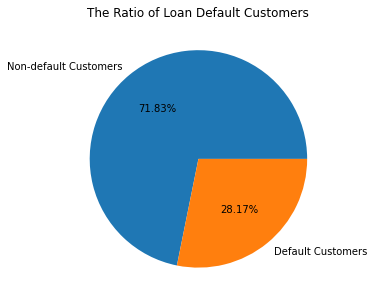

In [144]:
# Use pie chart to demonstrate
plt.figure(figsize = (10,5))
plt.title("The Ratio of Loan Default Customers")
plt.pie(x = default, labels = ["Non-default Customers", "Default Customers"], autopct='%.2f%%')
plt.show()

### Observation:
From the 7500 customers, there is 71.83% non-default, 28.17% are loan default customers.\
28.17% loan default is consider a big number of risk to bank. We have to find out the loan default prediction and design solutions.

### What is the ratio of Home Ownership?

In [89]:
#count the total number of Home Ownership
h_ownership = pd.value_counts(df_raw["Home Ownership"])
h_ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

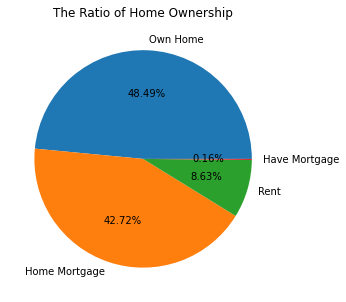

In [145]:
#Use pie chart to demonstrate
plt.figure(figsize = (10,5))
plt.title("The Ratio of Home Ownership")
plt.pie(x = h_ownership, labels = ["Own Home", "Home Mortgage", "Rent", "Have Mortgage"], autopct='%.2f%%')
plt.show()

### Observation:
The ratio is: \
Own Home = 48.49% \
Home Mortgage = 42.72% \
Rent = 8.63% \
Have Mortgage = 0.16%

# Exploratory Data Analysis

## 1) What is the relationship between Home Ownership and Credit Default?

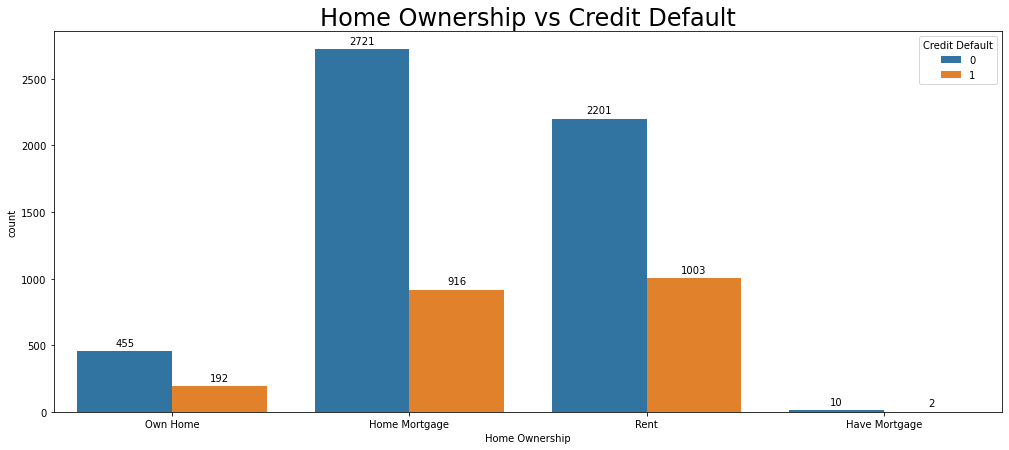

In [128]:
# the relationship between Home Ownership vs Credit Default
plt.figure(figsize = (17,7))
plt.title("Home Ownership vs Credit Default", fontsize = 24)
ax = sns.countplot(data = df_raw, x = df_raw["Home Ownership"], hue = "Credit Default")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='black', size=10)
plt.show()

### Observation:
From the bar chart we can observe that 'Home Morgage' and 'Rent' have high rate for credit default, whereby 'Rent' has the highest ratio as compared to other type of home ownership.\
Accommodation/lodging cost plays an important part of our living expenses. It is costly and cannot be ignore. Creditor/Bank can always send information to loan borrowers to advise them to check their financial status quarterly, provide information of refinance service, update loan’s term & conditions like any adjustable-rate loan etc. These to alert borrower to well manage their financial with enough updated information.

## 2) How the loan purpose affect the credit default? 

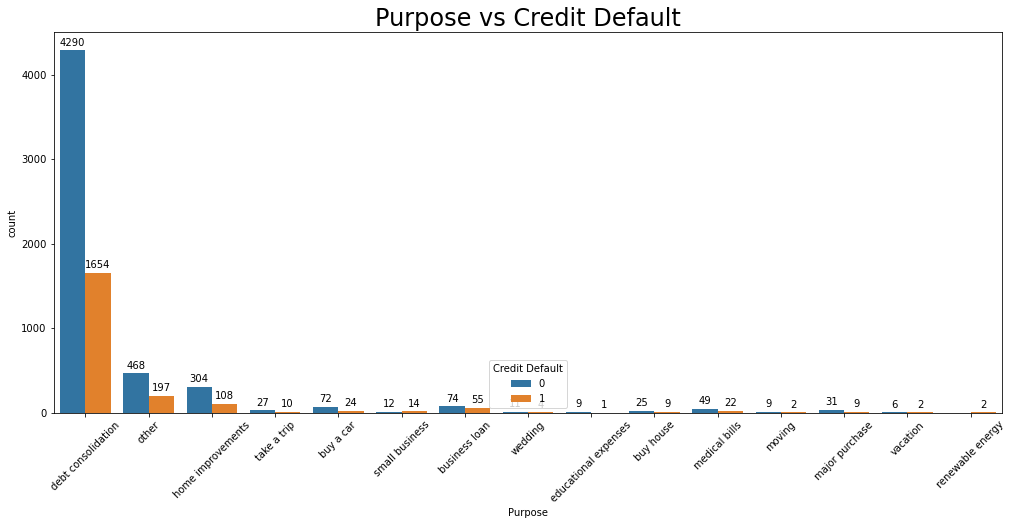

In [149]:
plt.figure(figsize = (17,7))
plt.title("Purpose vs Credit Default", fontsize = 24)
ax = sns.countplot(data = df_raw, x = df_raw["Purpose"], hue = "Credit Default")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+150), ha='center', va='top', color='black', size=10)
plt.xticks(rotation = 45)
plt.show()

### Observation:
Debt consolidation has the highest rate of credit default. \
Debt consolidation means combining more that one debt obligation into a new loan with a favourable term structure such as lower interest rate structure, tenure/term etc. Debt consolidation is used by consumers to pay off a small debt in one go by taking one big loan. By doing this they save on interest as well as the finance cost of the small loan owed by them. The borrower would now have to make one payment instead of making multiple payments to other creditors.\
In another word, this group of borrowers spent a lot for different purposes. Creditor must monitor closely for this group of borrowers, and relook into the debt consolidation plan term & conditions and charges.

## 3) Does Years in current job will affect Credit Score in Loan Term?

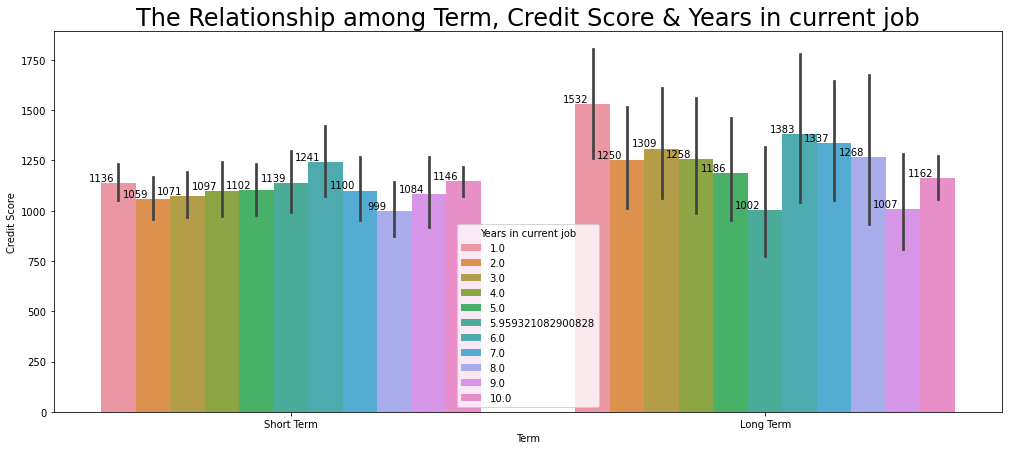

In [130]:
plt.figure(figsize = (17,7))
plt.title("The Relationship among Term, Credit Score & Years in current job", fontsize = 24)
ax = sns.barplot(data = df_raw, x = df_raw['Term'], y = df_raw['Credit Score'], hue = df_raw['Years in current job'])
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+50), ha='center', va='top', color='black', size=10)
plt.show()

### Observation:
1 years & 6 years in current job have the better credit score in both short term and long-term loan period. This is maybe because of those 1 year in current job are fresh graduated, they yet to have affordability to apply loan. Those 6 years in current job, their status are more stable in terms of income and commitment. \
I would recommend the creditor/bank to offer more products which suits these 2 groups of people to increase the chance of profitability. 

## 4) How is the relationship among Years of Credit History, Annual Income and Credit Default?

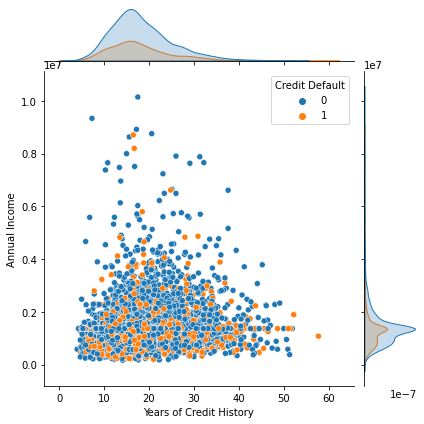

In [158]:
sns.jointplot(data = df_raw, x="Years of Credit History", y="Annual Income", hue = 'Credit Default')

### Observation:
The graph shows that people in 10 to 20 years of credit history and who have estimated annual income between 0 to 2 million, there got higher amount of loan default. \
The reasons of default loan during this period maybe because of various things that happened in life. Example marriage, buy house, travel, children education fee, parent & children medical fee, increase standard of living etc. All these will affect the financial activities. \
I would suggest to build a special team to assist this targeted group of people to give professional way to rearrange their financial structure.

# Model Building

## Data Labelling

In [23]:
# set another dataframe to avoid confusion of above data visualization.
df = df_raw

In [24]:
# convert to numeric values(label) for the columns

label_encoder = preprocessing.LabelEncoder()
df['Home Ownership']= label_encoder.fit_transform(df['Home Ownership'])
df['Purpose']= label_encoder.fit_transform(df['Purpose'])
df['Term']= label_encoder.fit_transform(df['Term'])
print(df.head())

   Home Ownership  Annual Income  Years in current job  Tax Liens  \
0               2       482087.0              5.959321        0.0   
1               2      1025487.0             10.000000        0.0   
2               1       751412.0              8.000000        0.0   
3               2       805068.0              6.000000        0.0   
4               3       776264.0              8.000000        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                        

In [25]:
X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]] # allocate all the features to the X column
y = df.iloc[:, 16] # allocate the exited column as the label in y

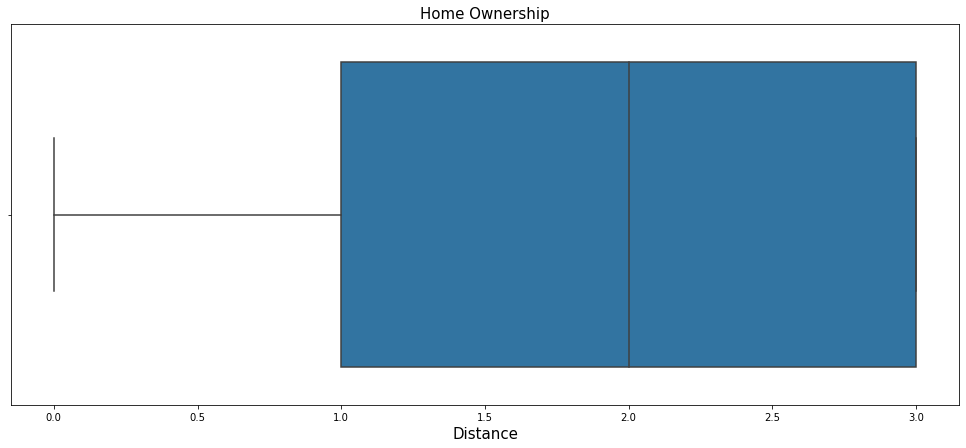

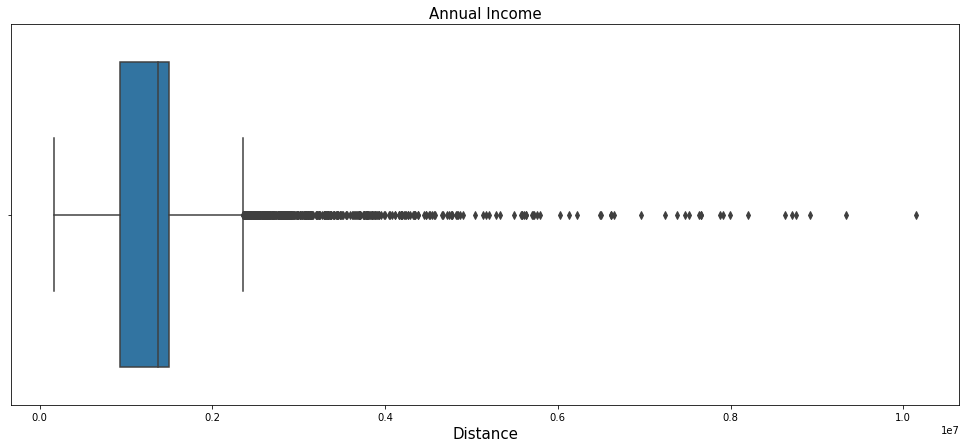

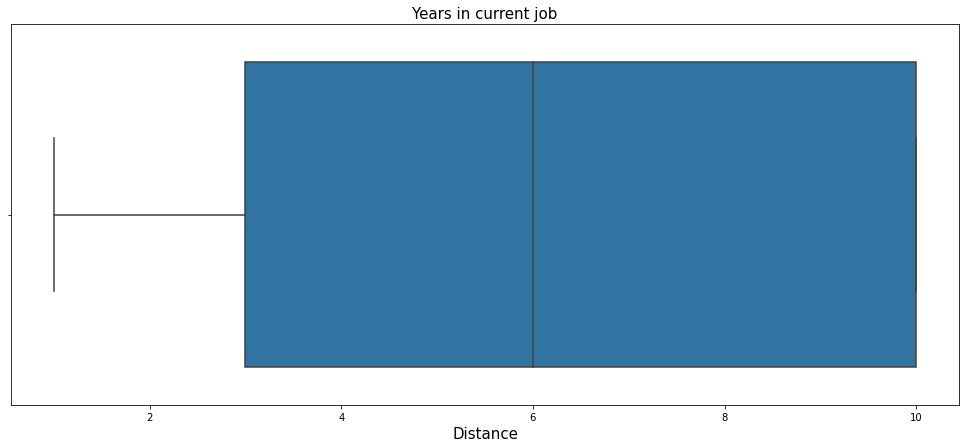

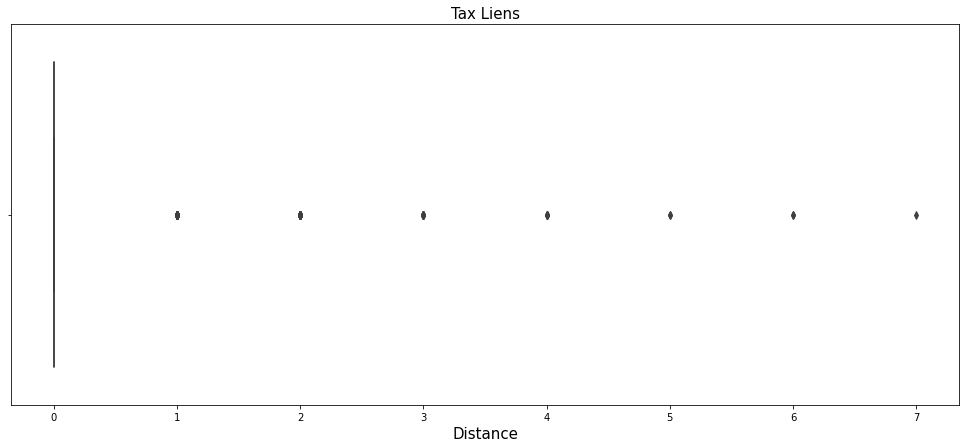

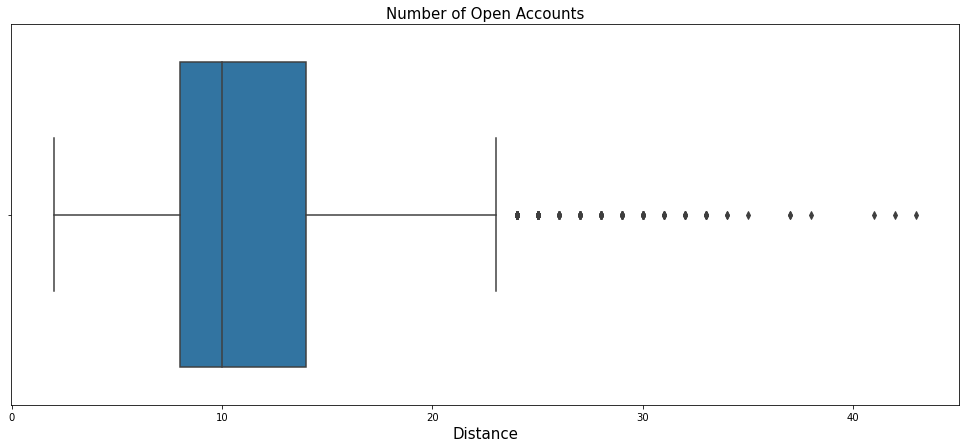

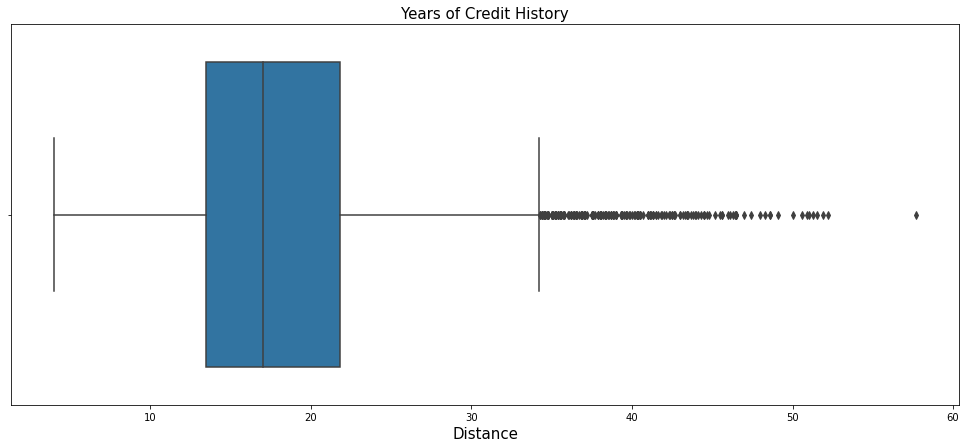

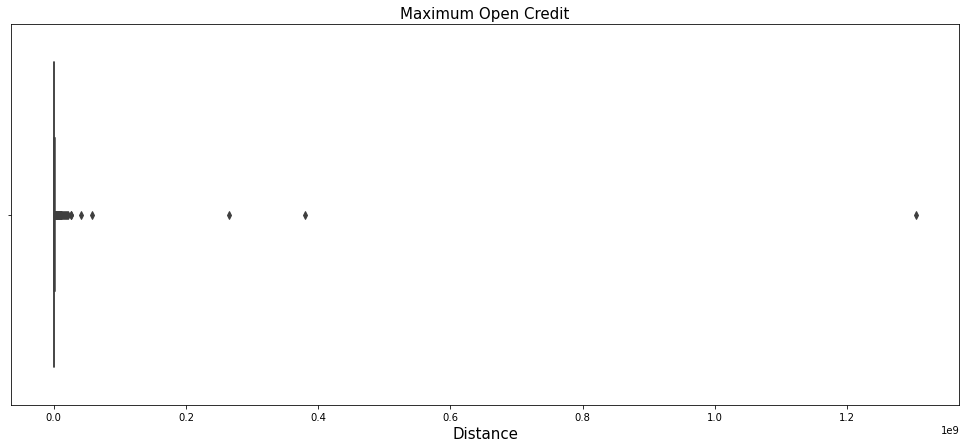

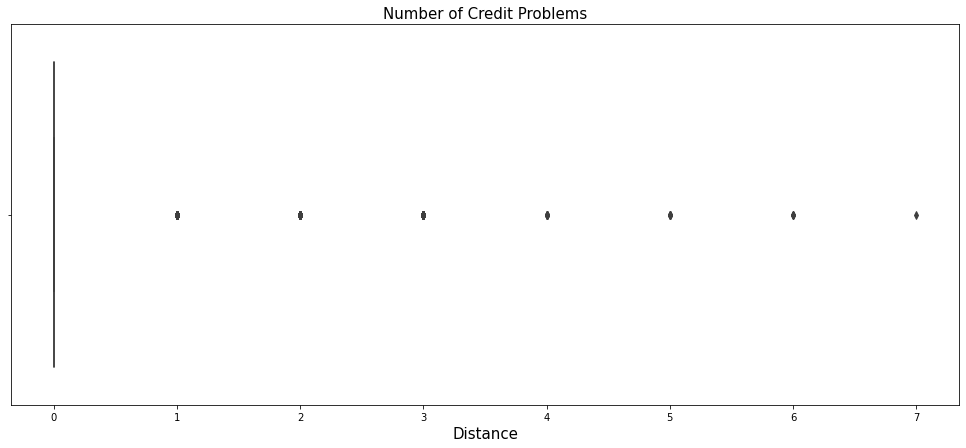

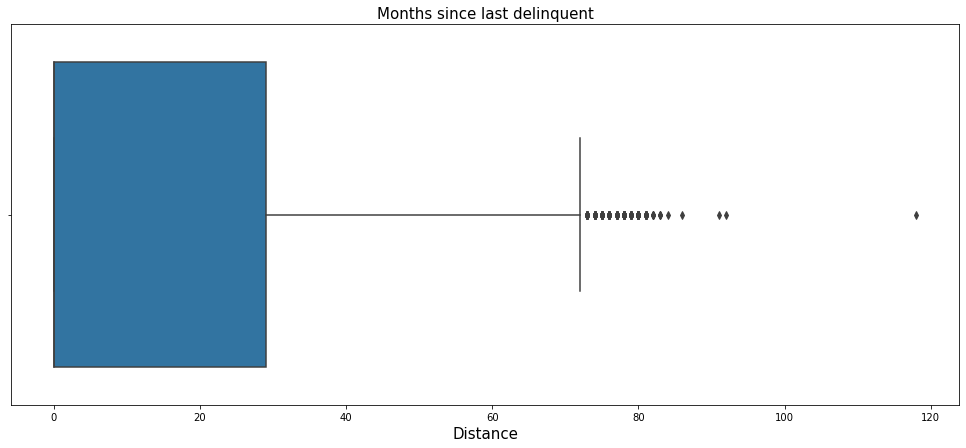

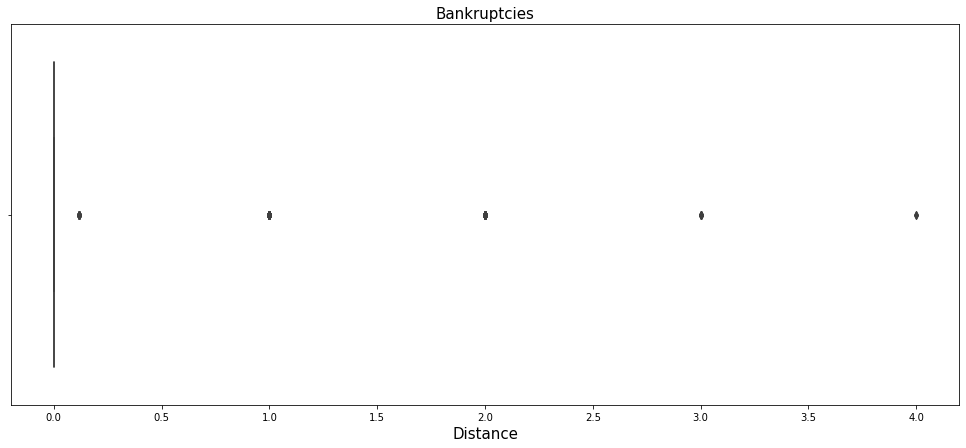

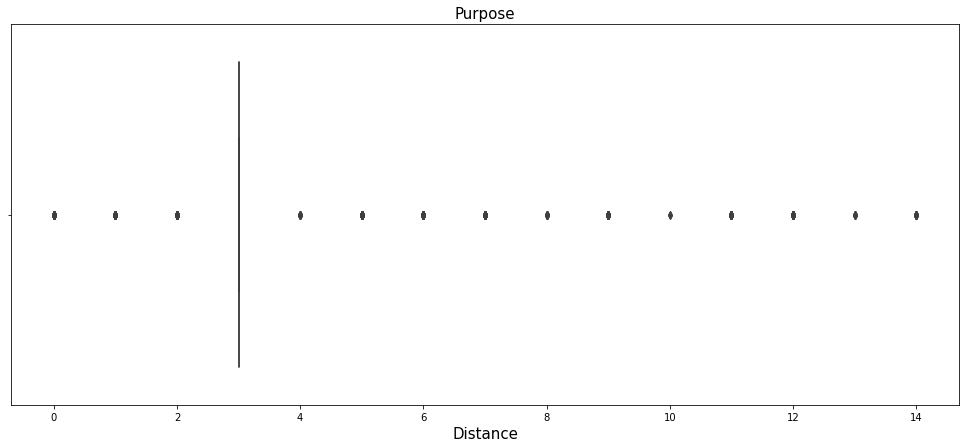

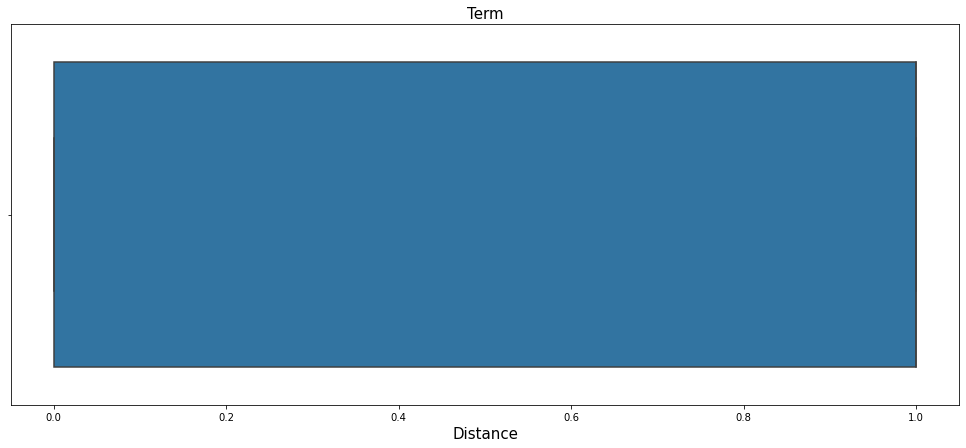

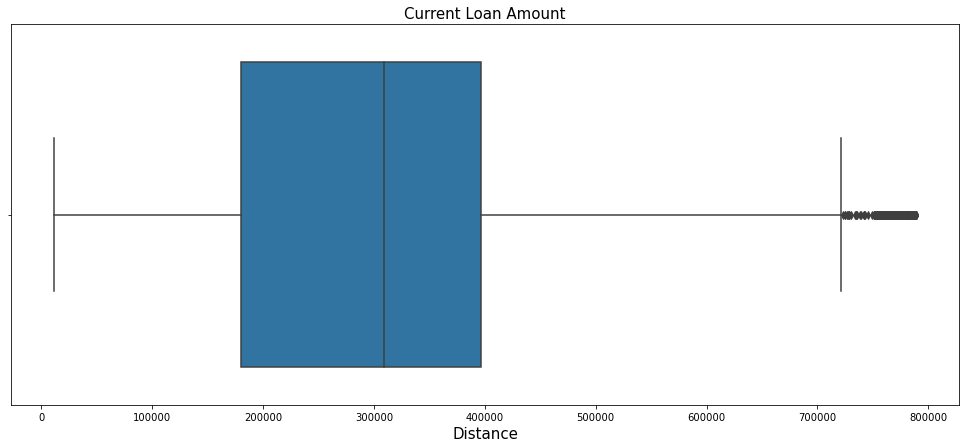

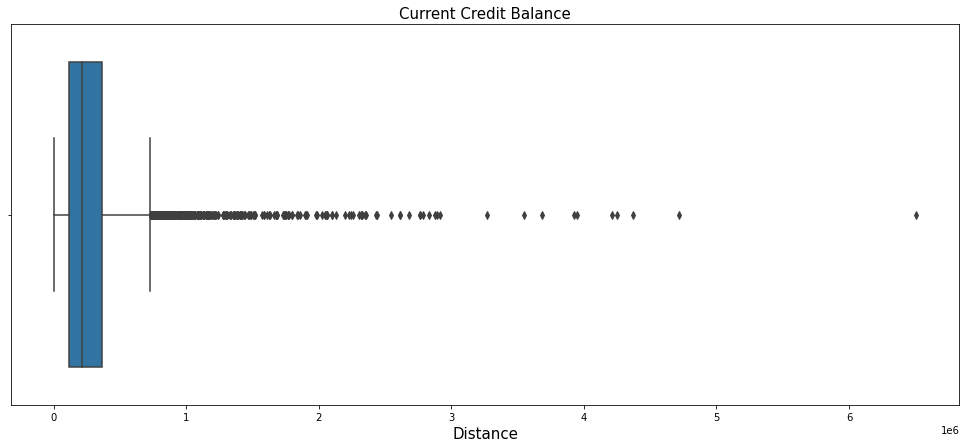

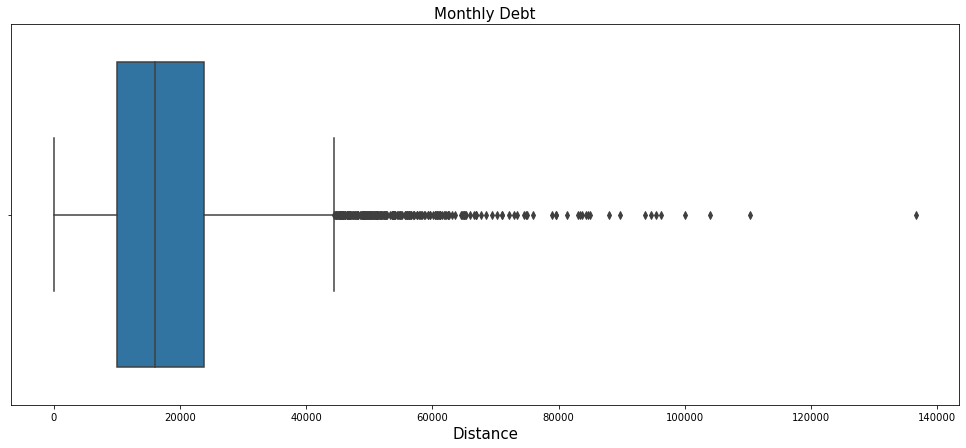

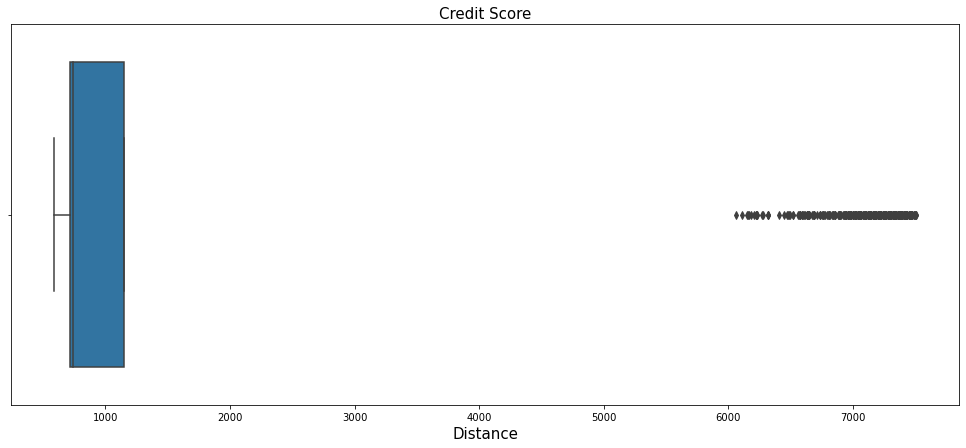

In [26]:
# check outlier in columns, remove it if needed
for i in X.columns:
    plt.figure(figsize = (17,7))
    sns.boxplot(x = df[i])
    plt.title(i, fontsize = 15)
    plt.xlabel('Distance', fontsize = 15)
plt.show()

In [27]:
df.info() # check again info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   int32  
 1   Annual Income                 7500 non-null   float64
 2   Years in current job          7500 non-null   float64
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  7500 non-null   float64
 9   Bankruptcies                  7500 non-null   float64
 10  Purpose                       7500 non-null   int32  
 11  Term                          7500 non-null   int32  
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [28]:
list_of_columns_with_outliers = ['Annual Income',
                                'Current Loan Amount',
                                'Current Credit Balance',
                                'Monthly Debt',
                                'Credit Score'
                               ]

In [29]:
for i in list_of_columns_with_outliers:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        df[i] = df[i][~((df[i] < (Q1 - 1.5 * IQR)) |(df[i] > (Q3 + 1.5 * IQR)))]

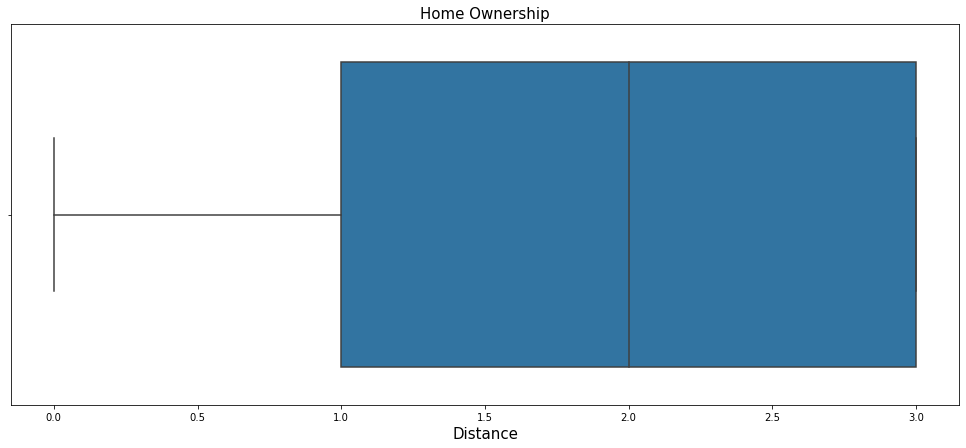

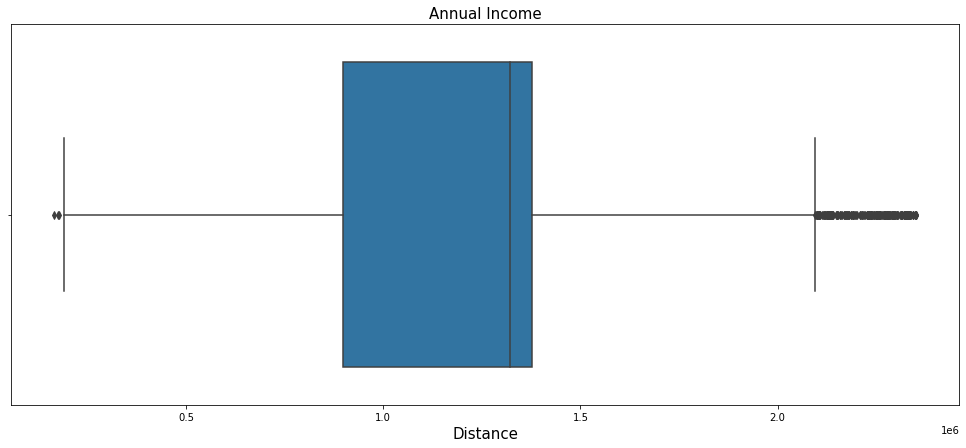

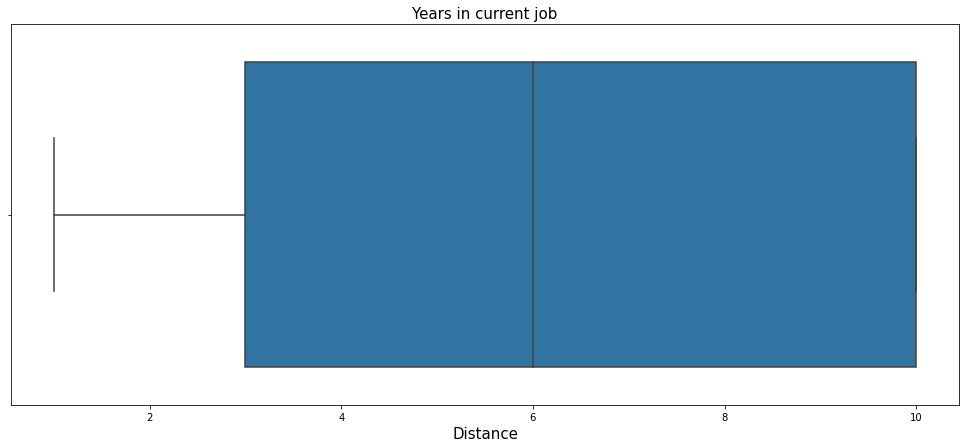

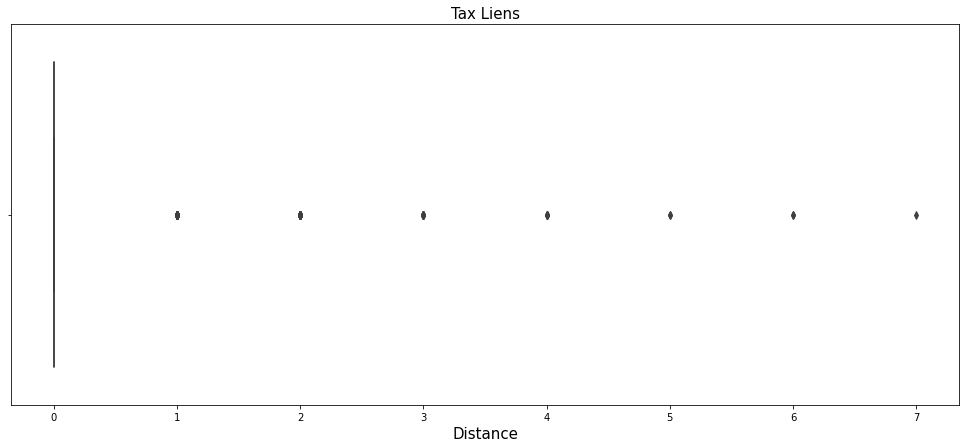

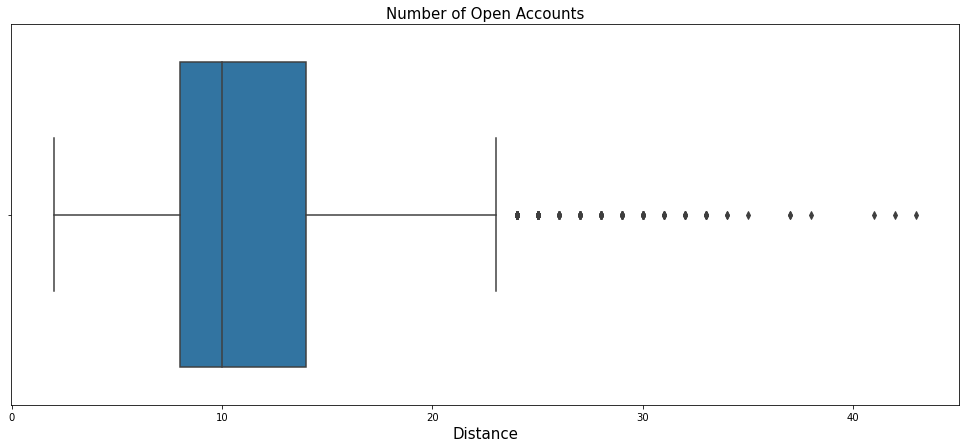

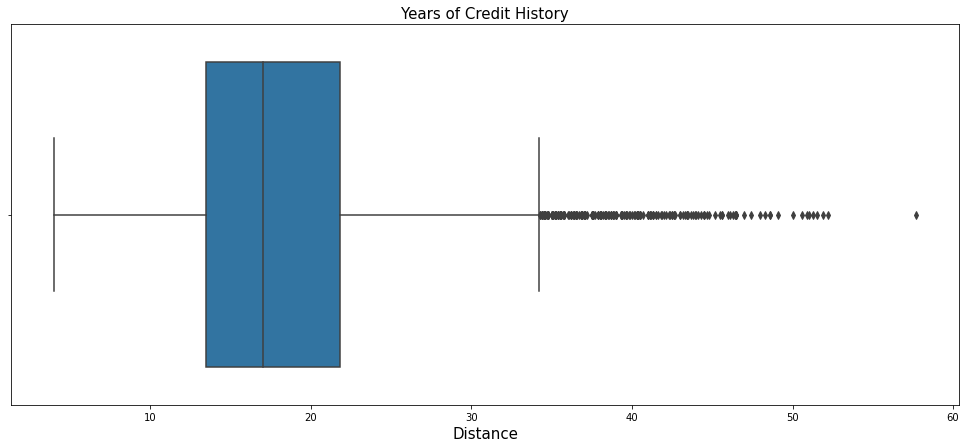

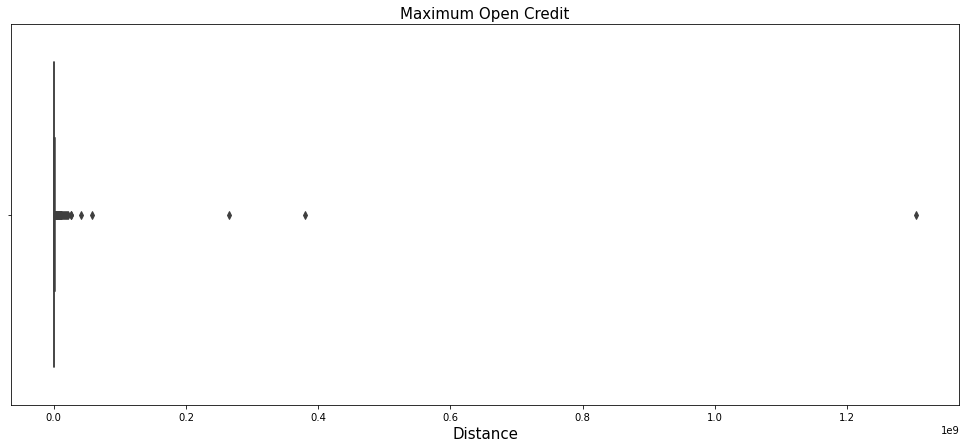

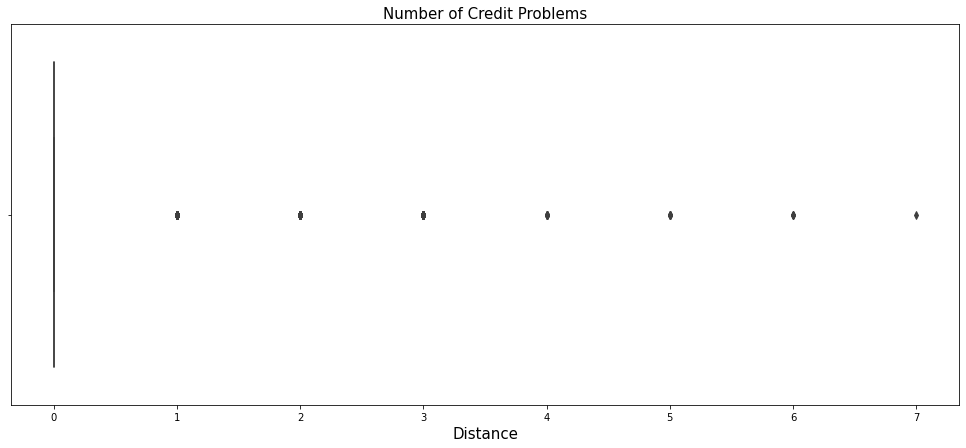

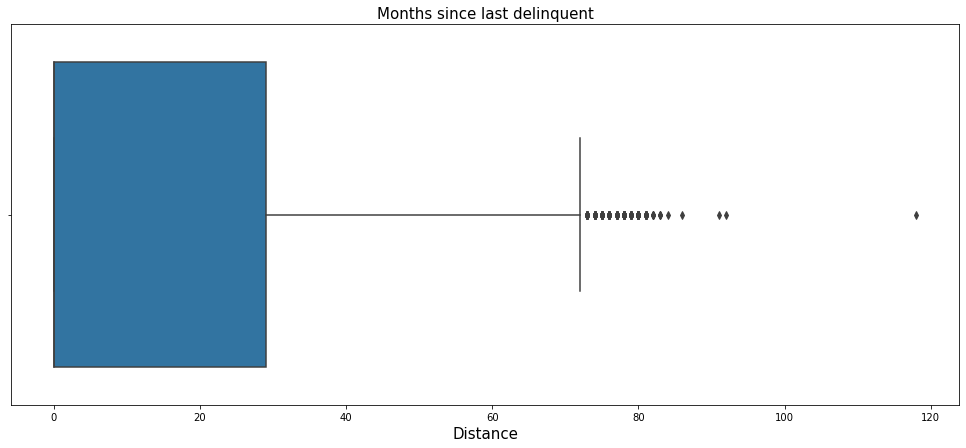

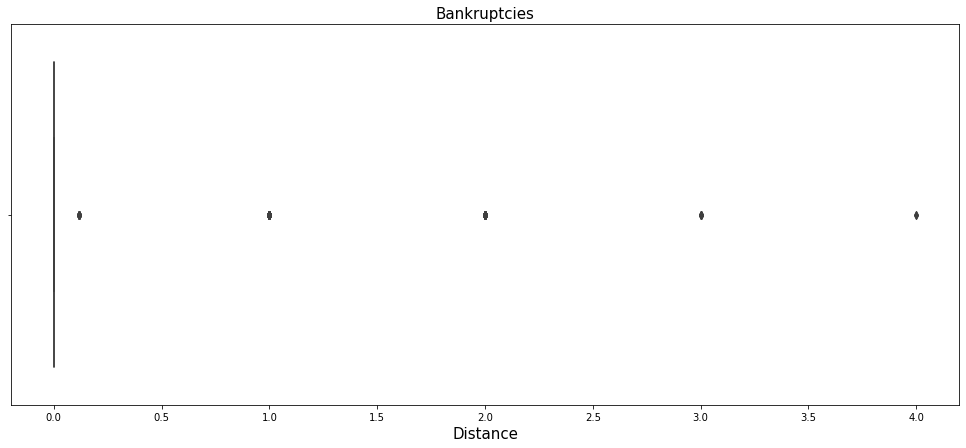

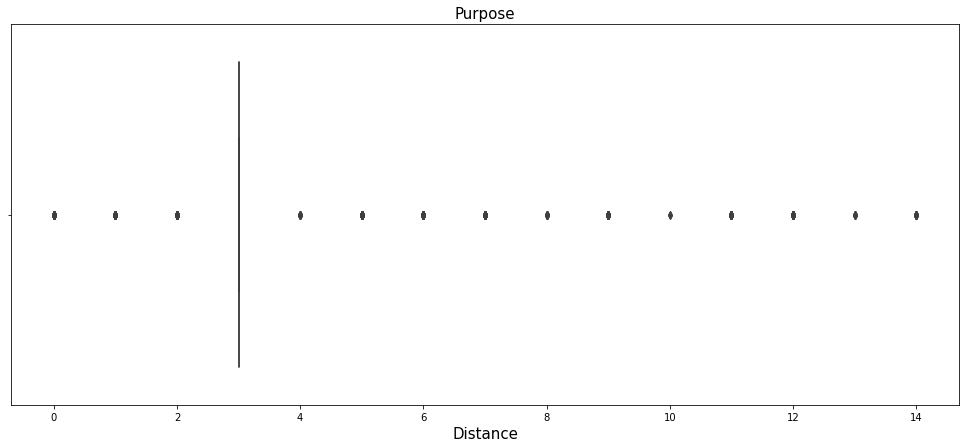

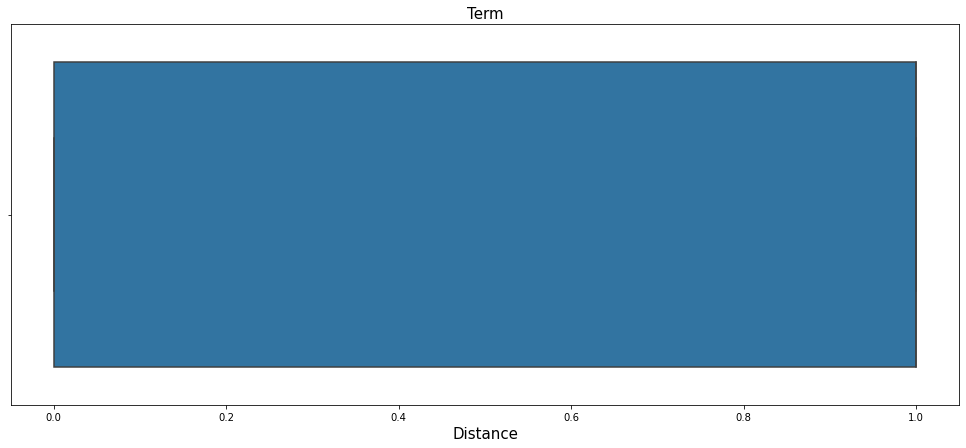

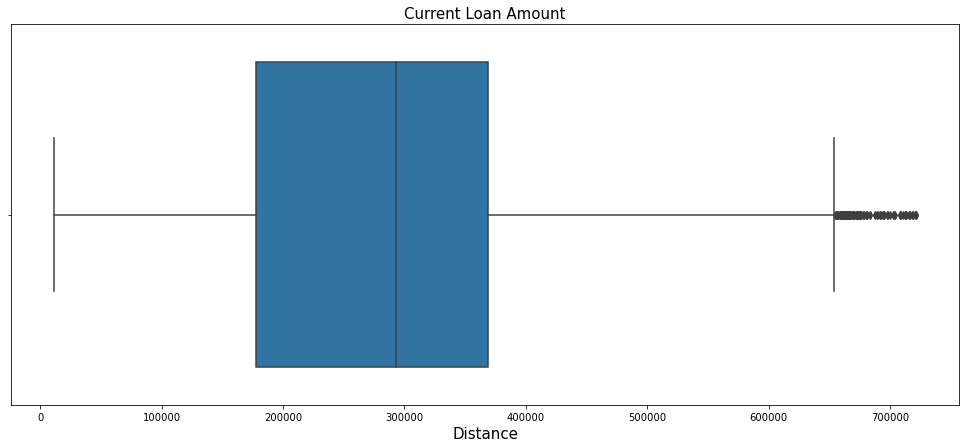

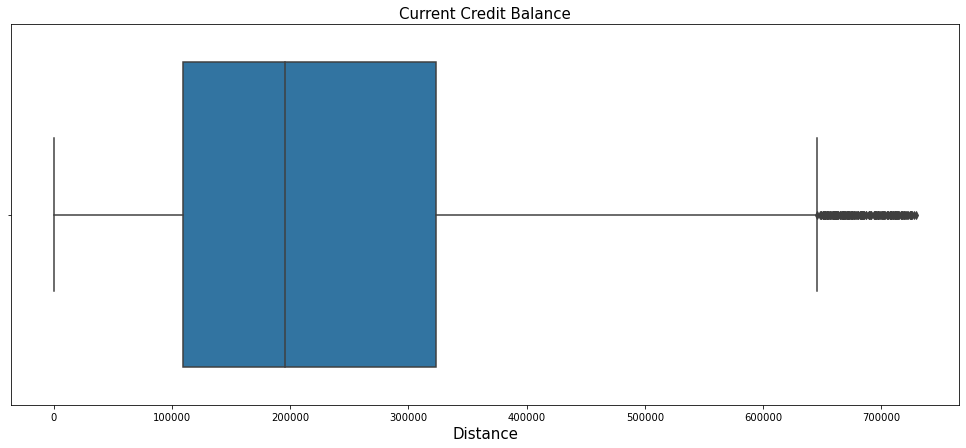

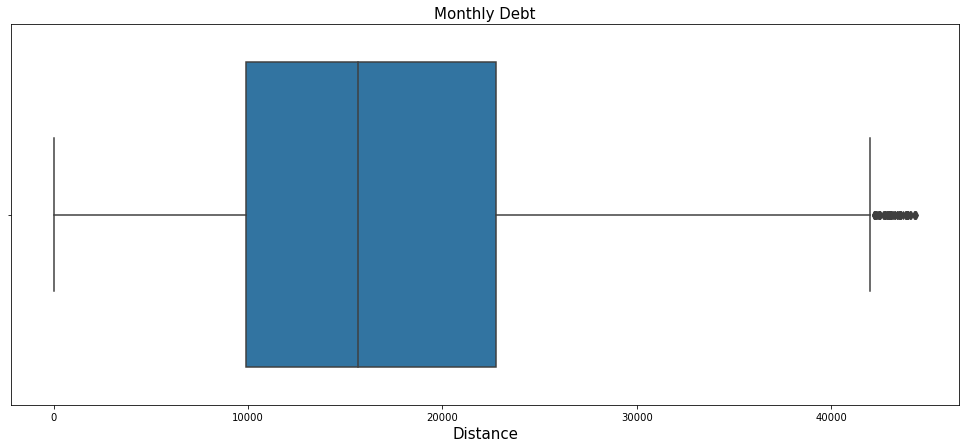

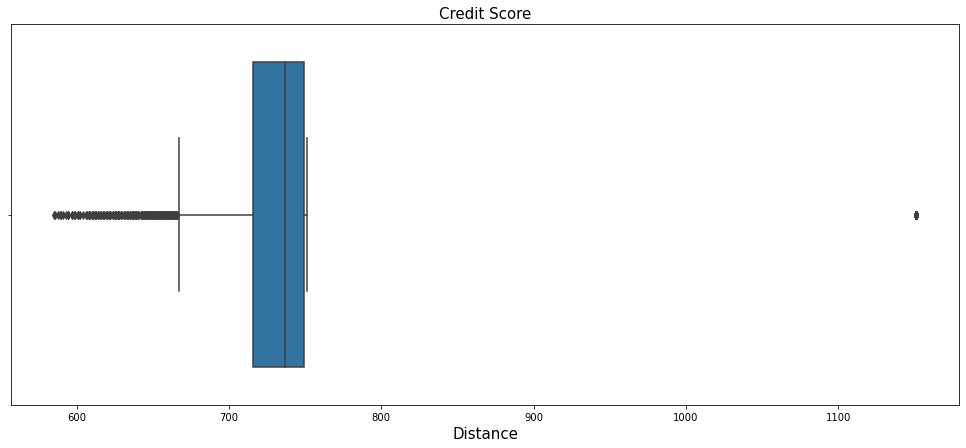

In [30]:
# check again the outcome after adjust those outlier in columns.
for i in X.columns:
    plt.figure(figsize = (17,7))
    sns.boxplot(x = df[i])
    plt.title(i, fontsize = 15)
    plt.xlabel('Distance', fontsize = 15)
plt.show()

### Summary: 
- Data preparation for machine learing.
- I found that there are many outliers. But I will only replace outlier with quantile of the elements below instead of I drop the outlier. If I drop the outlier, I will not have good enough number of data to build the machine learning model
- Adjusted outlier: Annual Income, Current Loan Amount, Current Credit Balance, Monthly Debt, Credit Score. 

## Prepare Training Dataset
- Check imbalance dataset.
- Prepare balance dataset.

In [31]:
# prepare data training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 88)
sc = StandardScaler() #scale the data
X_train = sc.fit_transform(X_train) #fit into the train dataset
X_test = sc.transform(X_test)

In [32]:
# check the balance of dataset
unique, count = np.unique(y_train, return_counts = True)
y_train_count = { k:v for (k,v) in zip (unique, count) }
y_train_count

{0: 4334, 1: 1666}

In [33]:
# convert imbalance dataset to balance dataset
sm = SMOTE(random_state = 88)
X_train_rs, y_train_rs = sm.fit_resample(X_train, y_train) 

In [34]:
unique, count = np.unique(y_train_rs, return_counts = True)
y_train_count = { k:v for (k,v) in zip (unique, count) }
y_train_count

{0: 4334, 1: 4334}

## a) KNeigborsClassifier 

In [35]:
knn_classifier = KNeighborsClassifier() #define classifier
knn_classifier.fit(X_train_rs, y_train_rs) # fit training sets into the model
y_pred = knn_classifier.predict(X_test) # predict and test

[[663 390]
 [203 244]]
              precision    recall  f1-score   support

           0       0.77      0.63      0.69      1053
           1       0.38      0.55      0.45       447

    accuracy                           0.60      1500
   macro avg       0.58      0.59      0.57      1500
weighted avg       0.65      0.60      0.62      1500



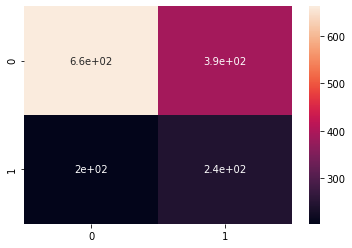

In [36]:
knn_cm = confusion_matrix(y_test, y_pred) # measure using confusion metrix
sns.heatmap(knn_cm, annot=True) # plot the confusion metrix
print(knn_cm) 
print(classification_report(y_test, y_pred))

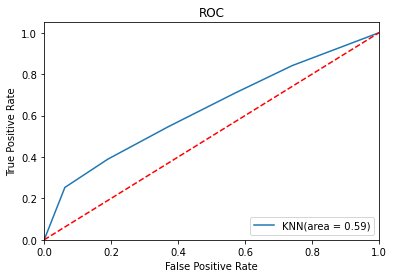

In [37]:
area_under_curve = roc_auc_score(y_test, knn_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn_classifier.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=str('KNN') + '(area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## b) RandomForestClassifier 

In [38]:
rf_classifier = RandomForestClassifier() # define classifer 
rf_classifier.fit(X_train_rs, y_train_rs) # fit training sets into the model
y_pred = rf_classifier.predict(X_test) # predict and test

[[942 111]
 [279 168]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83      1053
           1       0.60      0.38      0.46       447

    accuracy                           0.74      1500
   macro avg       0.69      0.64      0.65      1500
weighted avg       0.72      0.74      0.72      1500



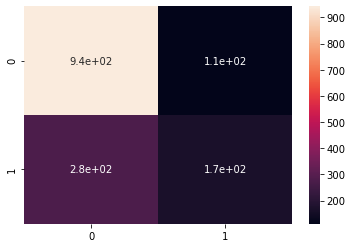

In [39]:
rf_cm = confusion_matrix(y_test, y_pred) # measure using confusion metrix
sns.heatmap(rf_cm, annot=True) # plot the confusion metrix
print(rf_cm)
print(classification_report(y_test, y_pred))

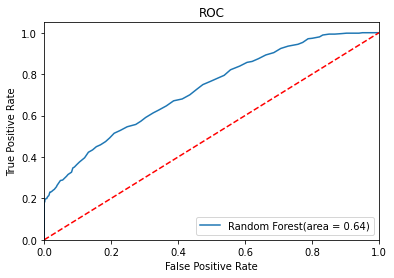

In [40]:
area_under_curve = roc_auc_score(y_test, rf_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=str('Random Forest') + '(area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## c) LogisticRegression

In [41]:
lr_classifier = LogisticRegression() # define classifer 
lr_classifier.fit(X_train_rs, y_train_rs) # fit training sets into the model
y_pred = lr_classifier.predict(X_test) # predict and test

[[809 244]
 [206 241]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1053
           1       0.50      0.54      0.52       447

    accuracy                           0.70      1500
   macro avg       0.65      0.65      0.65      1500
weighted avg       0.71      0.70      0.70      1500



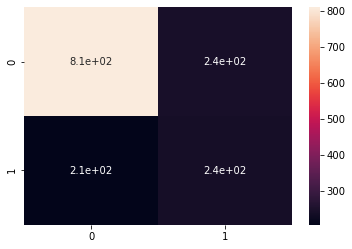

In [42]:
lr_cm = confusion_matrix(y_test, y_pred) # measure using confusion metrix
sns.heatmap(lr_cm, annot=True) # plot the confusion metrix
print(lr_cm)
print(classification_report(y_test, y_pred))

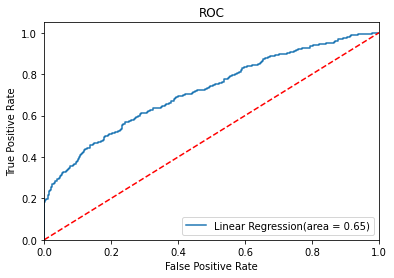

In [43]:
area_under_curve = roc_auc_score(y_test, lr_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr_classifier.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=str('Linear Regression') + '(area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## d) Gaussian Naive Bayes 

In [44]:
g_classifier = GaussianNB() # define classifer 
g_classifier.fit(X_train_rs, y_train_rs) # fit training sets into the model
y_pred = g_classifier.predict(X_test) # predict and test

[[659 394]
 [159 288]]
              precision    recall  f1-score   support

           0       0.81      0.63      0.70      1053
           1       0.42      0.64      0.51       447

    accuracy                           0.63      1500
   macro avg       0.61      0.64      0.61      1500
weighted avg       0.69      0.63      0.65      1500



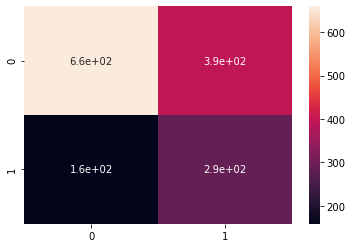

In [45]:
g_cm = confusion_matrix(y_test, y_pred) # measure using confusion metrix
sns.heatmap(g_cm, annot=True) # plot the confusion metrix
print(g_cm)
print(classification_report(y_test, y_pred))

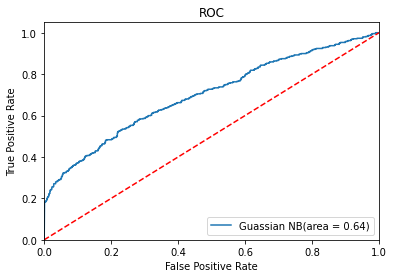

In [46]:
area_under_curve = roc_auc_score(y_test, g_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, g_classifier.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=str('Guassian NB') + '(area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

After testing on the four models we found out that random forest provides a better prediction, hence we will use random forest for hyper parimeter tuning to find out the best model for this prediction.

## Hyperparameter Tuning

In [47]:
# setup test range for parameter tuning
param_dict1 = {"n_estimators" : [10 , 20 , 50, 100, 150, 200] ,  # define range of trees to test
               "max_depth" : [3 , 4, 5, 6, 7], # define range of max depth to test
              "max_features" : [4, 6, 8, 10, 12, 14, 15] } # define max features to test

In [48]:
# grid search for parameter tuning
grid_model = GridSearchCV(estimator=rf_classifier, param_grid= param_dict1 , cv=5, n_jobs=-1 , verbose=1) 

In [49]:
grid_model.fit(X_train_rs , y_train_rs) # fit training set into the model
grid_model.best_params_ # find best parameter

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


{'max_depth': 7, 'max_features': 4, 'n_estimators': 150}

In [50]:
y_pred2 = grid_model.predict(X_test)

[[884 169]
 [239 208]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1053
           1       0.55      0.47      0.50       447

    accuracy                           0.73      1500
   macro avg       0.67      0.65      0.66      1500
weighted avg       0.72      0.73      0.72      1500



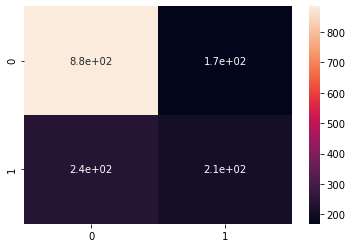

In [51]:
rf_cm2 = confusion_matrix(y_test, y_pred2) # measure using confusion metrix
sns.heatmap(rf_cm2, annot=True) # plot the confusion metrix
print(rf_cm2)
print(classification_report(y_test, y_pred2))

## Summary:
Since we are predicting loan default. After hyperparameter tuning, the Random Forest Classifier performs better in predicting loan default (1), which f1 score increased together with micro average and weighted average as compared to the previous.


## Feature Importance

In [153]:
# as per tested, assisgned best parimeter to variable best
best = RandomForestClassifier(max_depth = 7, max_features=8, n_estimators = 100, random_state = 11)

In [154]:
model_rf = best.fit(X_train_rs, y_train_rs)

In [155]:
model_rf.feature_importances_

array([0.02124178, 0.15762058, 0.01225866, 0.00049875, 0.01670419,
       0.02230153, 0.02782192, 0.00193764, 0.01253325, 0.00096309,
       0.00812025, 0.08364649, 0.11772605, 0.0135157 , 0.0188676 ,
       0.48424251])

<AxesSubplot:>

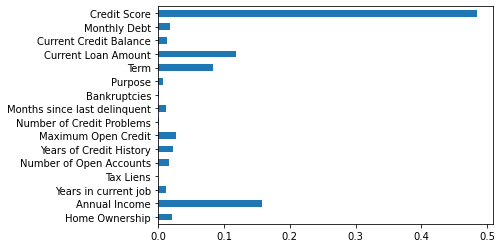

In [156]:
feat_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

# Conclusion:
From the graph of featured importance for the training, we found that the most important is the Credit Score of the borrowers, follow by Annual Income and Current Loan Amount.\
Not important for this training is Bankruptcies, Number of Credit Problems and Tax Liens.\
Creditor/bank must guard the loan approval tightly accordingly credit score. This is to play a safe side that to reduce default loan rate.  


## Thank you 